<html><head><meta content="text/html; charset=UTF-8" http-equiv="content-type"><style type="text/css">ol</style></head><body class="c5"><p class="c0 c4"><span class="c3"></span></p><p class="c2 title" id="h.rrbabt268i6e"><h1>CaImAn&rsquo;s Demo pipeline, </h1></p><p class="c0"><span class="c3">This notebook will help to demonstrate the process of CaImAn and how it uses different functions to denoise, deconvolve and demix neurons from a Calcium Imaging Video. </span></p>
<p><img src="docs/img/quickintro.png" /></p>
<p class="c0"><span class="c3">More information can be found in CaImAn&rsquo;s documentation. </span></p>
</html>



In [1]:
#!/usr/bin/env python
from __future__ import division
from __future__ import print_function
from builtins import zip
from builtins import str
from builtins import map
from builtins import range
from past.utils import old_div
try:
    get_ipython().magic(u'load_ext autoreload')
    get_ipython().magic(u'autoreload 2')    
except:
    print('Not IPYTHON')
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib qt')   
import caiman as cm
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr
from caiman.components_evaluation import estimate_components_quality_auto
from caiman.motion_correction import motion_correct_oneP_rigid
from caiman.base.rois import register_ROIs
import os
import cv2
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour

try:
    cv2.setNumThreads(1)
except:
    print('Open CV is naturally single threaded')
import bokeh.plotting as bpl
bpl.output_notebook()

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading BokehJS ...

### Setup some parameters
many of them will be set directly calling the CNMF object

In [2]:
fnames = ['data_endoscope.tif']
frate = 10 # movie frame rate
gSig = 3   # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = 10  # average diameter of a neuron
do_motion_correction = True

Download the dataset if not already present

In [3]:
base_folder = './example_movies/'  
download_demo(fnames[0])
fnames = [os.path.abspath(os.path.join(base_folder,fnames[0]))]

File already downloaded


In [4]:
#m_orig = cm.load_movie_chain(fnames[:1])
#downsample_ratio = 0.2
#offset_mov = -np.min(m_orig[:100]).astype(np.float32)  # make the dataset mostly non-negative
#m_orig.resize(1, 1, downsample_ratio).play(
#gain=10, offset=offset_mov, fr=30, magnification=2)

In [5]:
#m_orig.shape

### (Re)start cluster.  

In [6]:
try:
    dview.terminate() # stop it if it was running
except:
    pass

c, dview, n_processes = cm.cluster.setup_cluster(backend='local', # use this one
                                                 n_processes=10,  # number of process to use, if you go out of memory try to reduce this one
                                                 )

0
0
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
70
60
60
70
70
70
70
70
70
70
80
70
70
80
80
80
80
80
80
90
80
80
80
90
90
90
90
90
90
90
90
90
(500, 80, 80)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
(500, 81, 80)
using 1 processes
using 1600 pixels per process
(500, 80, 81)
using 5000 block_size
using 1 processes
using 1600 pixels per process
preprocessing ...
using 5000 block_size
checking if missing data
preprocessing ...
checking if missing data
(500, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
initializing ...
Spatial Downsampling 1-photon
Spatial Downsampling 1-photon
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
Roi Extraction.

/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default o

0 neurons have been initialized


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


0 neurons have been initialized


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


In total,  4 neurons were initialized.
0 neurons have been initialized
Compute Background
In total,  3 neurons were initialized.
Compute Background
In total,  4 neurons were initialized.
Compute Background
Compute Residuals
Initialization again
Compute Residuals
Initialization again
0 neurons have been initialized
Compute Residuals
Initialization again
0 neurons have been initialized
Compute Residuals
Initialization again
0 neurons have been initialized
0 neurons have been initialized
In total,  24 neurons were initialized.
Update Temporal
Generating residuals
In total,  33 neurons were initialized.
Update Temporal
entering the deconvolution 
Generating residuals
11 out of total 28 temporal components updated
19 out of total 28 temporal components updated
entering the deconvolution 
24 out of total 28 temporal components updated
27 out of total 28 temporal components updated
28 out of total 28 temporal components updated
14 out of total 34 temporal components updated
11 out of total 28

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6479


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6399


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6479
4999
9999
14999
16383


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine pre

4999
9999
16383
14999
4999
9999
14999
16383
(500, 81, 81)
using 1 processes
(500, 81, 80)
using 1600 pixels per process
using 1 processes
using 5000 block_size
using 1600 pixels per process
preprocessing ...
using 5000 block_size
preprocessing ...
checking if missing data
checking if missing data
(500, 80, 80)
using 1 processes
(500, 80, 81)
using 1600 pixels per process
using 1 processes
using 5000 block_size
using 1600 pixels per process
preprocessing ...
using 5000 block_size
checking if missing data
preprocessing ...
checking if missing data
initializing ...
Spatial Downsampling 1-photon
initializing ...
Spatial Downsampling 1-photon
initializing ...
initializing ...
Roi Extraction...
Spatial Downsampling 1-photon
One photon initialization..
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
Roi Extraction...
One photon initialization..
Roi Extraction...
One photon initialization..
0 neurons have been initialized


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/signal/spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
0 neurons have been initialized
0 neurons have been initialized
In total,  5 neurons were initialized.
Compute Background
In total,  4 neurons were initialized.
Compute Background
In total,  5 neurons were initialized.
Compute Background
Compute Residuals
Initialization again
Compute Residuals
Initialization again
Compute Residuals
Initialization again
Compute Residuals
Initialization again
0 neurons have been initialized
0 neurons have been initialized
0 neurons have been initialized
0 neurons have been initialized
In total,  29 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
In total,  29 neurons were initialized.
Update Temporal
Generating residuals
In total,  29 neurons were initialized.
13 out of total 33 temporal components updated
Update Temporal
Generating residuals
entering the deconvolution 
23 out of total 33 temporal components updated
29 out 

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
Estimate low rank Background
1999
2999
3999
4999
5999
6399


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6479
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6479
4999
9999
14999
16383
4999
9999
14999
16383
4999
9999
14999
16383


### Creation of a memory mappable file. 
    - Performs motion correction and simultaneously creates a memory mappable file in F order
    - Transforms into C order (much more efficient for parallel processing
    - If you have multiple files there are ways to process many at the same time (not shown)
    

Rigid Motion Correction
5.3534045
-1.699735164642334
Frame 100
cubic interpolation
Frame 100
-1.699735164642334
Frame 100
cubic interpolation


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/base/movies.py:260: UserWarning: ** Pixels averages are too negative. Removing 1 percentile. **
  '** Pixels averages are too negative. Removing 1 percentile. **')
/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/base/movies.py:279: UserWarning: Pixels averages are too negative for template. Removing 1 percentile.
  'Pixels averages are too negative for template. Removing 1 percentile.')


Frame 100
-1.699735164642334
Frame 100
cubic interpolation
Frame 100
Adding to movie 5.3534045
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.045475096
/media/sebastian/MYLINUXLIVE/MT/CaImAn/example_movies/data_endoscope_rig__d1_128_d2_128_d3_1_order_F_frames_1000_.mmap
loading in memory
mmap


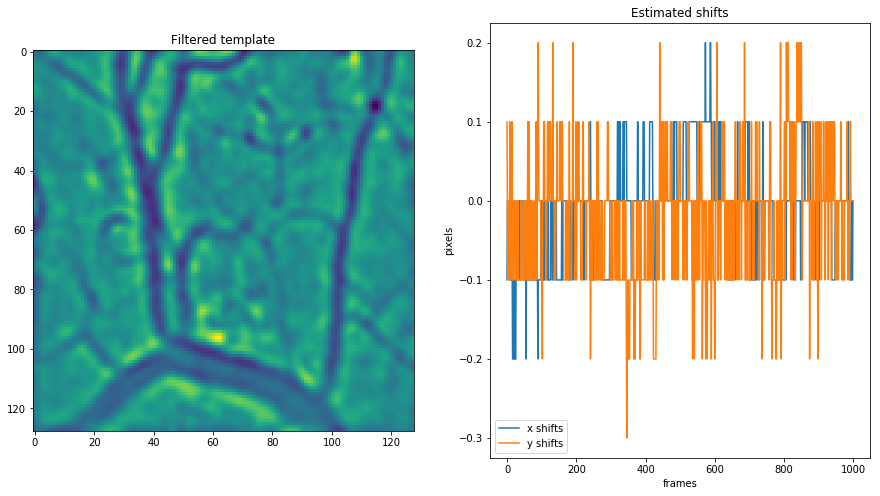

In [7]:
if do_motion_correction:
    mc = motion_correct_oneP_rigid(fnames[0],                        # name of file to motion correct
                               gSig_filt = [gSig]*2,                 # size of filter, xhange this one if algorithm does not work 
                               max_shifts = [5,5],                   # maximum shifts allowed in each direction 
                               dview=dview, 
                               splits_rig = 10,                      # number of chunks for parallelizing motion correction (remember that it should hold that length_movie/num_splits_to_process_rig>100) 
                               save_movie = True)                    # whether to save movie in memory mapped format
    
    new_templ = mc.total_template_rig
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)    
    plt.title('Filtered template')
    plt.imshow(new_templ)       #% plot template
    plt.subplot(1,2,2)
    plt.title('Estimated shifts')
    plt.plot(mc.shifts_rig)     #% plot rigid shifts
    plt.legend(['x shifts', 'y shifts'])
    plt.xlabel('frames')
    plt.ylabel('pixels')
    
    bord_px_rig = np.ceil(np.max(mc.shifts_rig)).astype(np.int)     #borders to eliminate from movie because of motion correction        
    fname_new = cm.save_memmap(mc.fname_tot_rig, base_name='memmap_', order = 'C') # transforming memoruy mapped file in C order (efficient to perform computing)
else:
    #% create memory mappable file
    fname_new = cm.save_memmap(fnames, base_name='memmap_', order = 'C')

# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
Y = Yr.T.reshape((T,) + dims, order='F')

Play the movie (optional). This will require loading the movie in memory which in general is not needed by the pipeline. Displaying the movie uses the OpenCV library. Press `q` to close the video panel. **BEWARE** the movie may appear in the background!

In [8]:
#m_orig = cm.movie(Y)
#downsample_ratio = 1.
#offset_mov = -np.min(m_orig[:100])  # make the dataset mostly non-negative
#m_orig.resize(1, 1, downsample_ratio).play(
#gain=2, offset=offset_mov, fr=30, magnification=2)

### Inspect summary images and set parameters
Check the optimal values of min_corr and min_pnr by moving slider in the figure that pops up

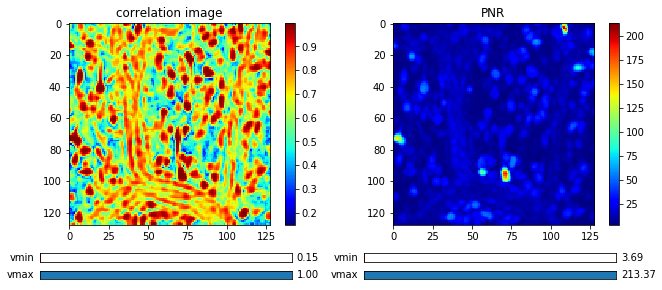

In [9]:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(Y, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
inspect_correlation_pnr(cn_filter,pnr)


In [10]:

min_corr = .8 # min correlation of peak (from correlation image)
min_pnr = 10 # min peak to noise ratio
min_SNR = 3 # adaptive way to set threshold on the transient size
r_values_min = 0.85  # threshold on space consistency (if you lower more components will be accepted, potentially with worst quality)
decay_time = 0.4  #decay time of transients/indocator

In [11]:
### Split Y into 2 seperate matrices, shift one to simulate between-trial differences

/media/sebastian/MYLINUXLIVE/MT/CaImAn/example_movies/Y1.npy
/media/sebastian/MYLINUXLIVE/MT/CaImAn/example_movies/Y2.npy


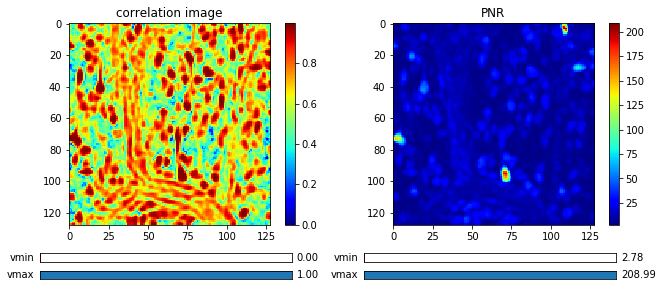

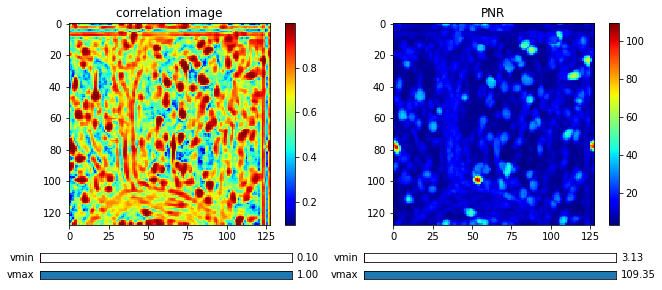

In [12]:
f2names = [os.path.abspath(os.path.join(base_folder,name))for name in ['Y1.npy','Y2.npy']]

Y1= Y[:500,:,:]
Y2= np.roll(np.roll(Y[500:,:,:],5,1),-3,2)


for i,name in enumerate(f2names):
    np.save(name,[Y1,Y2][i])

fname_new = cm.save_memmap_each(f2names, base_name='memmap_', order = 'C') 

Yr1, dims1, T1 = cm.load_memmap(fname_new[0])
Y1 = Yr1.T.reshape((T1,) + dims1, order='F')

Yr2, dims2, T2 = cm.load_memmap(fname_new[1])
Y2 = Yr2.T.reshape((T2,) + dims2, order='F')

# compute some summary images (correlation and peak to noise)
cn_filter1, pnr1 = cm.summary_images.correlation_pnr(Y1, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
inspect_correlation_pnr(cn_filter1,pnr1)
# compute some summary images (correlation and peak to noise)
cn_filter2, pnr2 = cm.summary_images.correlation_pnr(Y2, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
inspect_correlation_pnr(cn_filter2,pnr2)


In [13]:
### Set CNMF parameters

In [14]:
cnm = cnmf.CNMF(n_processes=n_processes, 
                method_init='corr_pnr',                 # use this for 1 photon
                k=70,                                   # neurons per patch
                gSig=(3, 3),                            # half size of neuron
                gSiz=(10, 10),                          # in general 3*gSig+1
                merge_thresh=.8,                        # threshold for merging
                p=1,                                    # order of autoregressive process to fit
                dview=dview,                            # if None it will run on a single thread
                tsub=2,                                 # downsampling factor in time for initialization, increase if you have memory problems             
                ssub=2,                                 # downsampling factor in space for initialization, increase if you have memory problems
                Ain=None,                               # if you want to initialize with some preselcted components you can pass them here as boolean vectors
                rf=(40, 40),                            # half size of the patch (final patch will be 100x100)
                stride=(20, 20),                        # overlap among patches (keep it at least large as 4 times the neuron size)
                only_init_patch=True,                   # just leave it as is
                gnb=16,                                 # number of background components
                nb_patch=16,                            # number of background components per patch
                method_deconvolution='oasis',           # could use 'cvxpy' alternatively
                low_rank_background=True,               # leave as is
                update_background_components=True,      # sometimes setting to False improve the results
                min_corr=min_corr,                      # min peak value from correlation image 
                min_pnr=min_pnr,                        # min peak to noise ration from PNR image
                normalize_init=False,                   # just leave as is
                center_psf=True,                        # leave as is for 1 photon
                del_duplicates=True)                    # whether to remove duplicates from initialization



In [15]:
### Fit both halves of the video:

In [16]:
cnm.fit(Y1)
A1,C1,b1,f1,Yra1 = cnm.A.copy(), cnm.C.copy(), cnm.b.copy(), cnm.f.copy(), cnm.YrA.copy()

cnm.fit(Y2)
A2,C2,b2,f2,Yra2 = cnm.A, cnm.C, cnm.b, cnm.f, cnm.YrA


(500, 128, 128)
using 10 processes
using 4000 pixels per process
using 5000 block_size
(80, 80)
18.26525592803955
Transforming patches into full matrix
Skipped %d Empty Patch 0
Generating background
Compressing background components with a low rank NMF
Generating background DONE
merging
No neurons merged!
update temporal
Generating residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Transposing


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


entering the deconvolution 
24 out of total 75 temporal components updated
45 out of total 75 temporal components updated
62 out of total 75 temporal components updated
71 out of total 75 temporal components updated
74 out of total 75 temporal components updated
75 out of total 75 temporal components updated
24 out of total 75 temporal components updated
45 out of total 75 temporal components updated
62 out of total 75 temporal components updated
71 out of total 75 temporal components updated
74 out of total 75 temporal components updated
75 out of total 75 temporal components updated
stopping: overall temporal component not changing significantly
update spatial ...
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Filling
--- 9.949884414672852 seconds ---
Removing tempfiles created
update tempo

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


No neurons merged!
update temporal
Generating residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Transposing
entering the deconvolution 
27 out of total 71 temporal components updated
47 out of total 71 temporal components updated
61 out of total 71 temporal components updated
70 out of total 71 temporal components updated
71 out of total 71 temporal components updated
27 out of total 71 temporal components updated
47 out of total 71 temporal components updated
61 out of total 71 temporal components updated
70 out of total 71 temporal components updated
71 out of total 71 temporal components updated
stopping: overall temporal component not changing significantly
update spatial ...
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
parallel dot product block size: 5000
Start product
Processed:[0, 4]
Filling
--- 8.541656970977783 seconds 

In [17]:
### Show detected neurons in Y1 and Y2

plot contours of identified components against correlation image

/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/utils/visualization.py:941: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


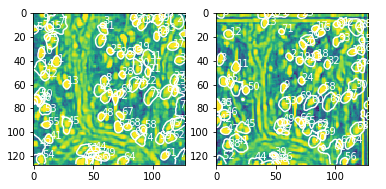

In [18]:
plt.subplot(1,2,1)
crd1 = cm.utils.visualization.plot_contours(A1, cn_filter1, thr=.8, vmax=0.95)
plt.subplot(1,2,2)
crd2 = cm.utils.visualization.plot_contours(A2, cn_filter2, thr=.8, vmax=0.95)

In [19]:
### Match the two without aligning:

In [20]:
matched_ROIs1, matched_ROIs2, non_matched1, non_matched2, performance = register_ROIs(A1,A2,dims1)


New Pair **
FOV: 0, shape: 75,71 total cost: 45.188260
0.02783203125
{'recall': 0.6933333333333334, 'precision': 0.7323943661971831, 'accuracy': 0.5531914893617021, 'f1_score': 0.7123287671232876}


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/utils/visualization.py:941: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


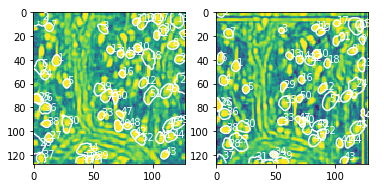

In [21]:
plt.subplot(1,2,1)
crd3 = cm.utils.visualization.plot_contours(A1[:,matched_ROIs1], cn_filter1, thr=.8, vmax=0.95)
plt.subplot(1,2,2)
crd4 = cm.utils.visualization.plot_contours(A2[:,matched_ROIs2], cn_filter2, thr=.8, vmax=0.95)

In [22]:
### Match the two with aligning:

In [26]:
matched_ROIs1, matched_ROIs2, non_matched1, non_matched2, performance = register_ROIs(A1,A2,dims1,cn_filter1,cn_filter2)


/home/sebastian/anaconda3/envs/caiman/lib/python3.6/site-packages/past/utils/__init__.py:95: RuntimeWarning: invalid value encountered in true_divide
  return a / b


New Pair **
FOV: 0, shape: 75,71 total cost: 39.525072
0.03294730186462402
{'recall': 0.7066666666666667, 'precision': 0.7464788732394366, 'accuracy': 0.5698924731182796, 'f1_score': 0.726027397260274}


/media/sebastian/MYLINUXLIVE/MT/CaImAn/caiman/utils/visualization.py:941: UserWarning: The way to call utilities.plot_contours has changed. Look at the definition for more details.
  warn("The way to call utilities.plot_contours has changed. Look at the definition for more details.")


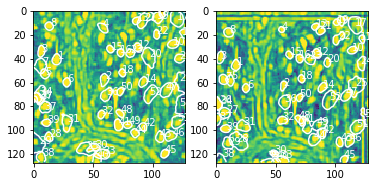

In [27]:
plt.subplot(1,2,1)
crd3 = cm.utils.visualization.plot_contours(A1[:,matched_ROIs1], cn_filter1, thr=.8, vmax=0.95)
plt.subplot(1,2,2)
crd4 = cm.utils.visualization.plot_contours(A2[:,matched_ROIs2], cn_filter2, thr=.8, vmax=0.95)

### Stop cluster

In [25]:
#%%
cm.stop_server(dview=dview)

 done
